# Gradient_maker

### Module to produce custom color maps that have smooth gradients in brightness 
*Amenable to monochrome visualization and reproduction, as well as ease of visualization by people with visual impairments*

#### Background

Good color palettes are hard to find, and they have been even harder to make. There are some useful tools on the Internet (see list of links below), but each has arbitrary limitations. Good scientific visualization imposes its own limitations, but they tend not to align with the more design-oriented resources on the web. Scientific visualization is a means of communicating data and results, and has particular needs ([*Zeller & Rogers 2020*](https://doi.org/10.1029/2020EO144330)).

A key aspect of clarity in color scales is that they can be viewed and interpreted by people with vision impairments including colorblindness. Furthermore, it is a big bonus if the graphics are still readable when rendered in black and white (e.g., photocopied). Having a continuous, smooth gradient of brightness is the best way to ensure universal readability. The result is a continuously increasing or decreasing greyscale that conveys the values in a plot or map. With such a foundation, the colors are secondary; they can convey information that is intuitive (e.g., blue for cold to red for warm), familiar (green for vegetated, brown for unvegetated), or attention-getting (bold colors in the range of peak interest).

#### Types of color scales

There are three basic categories of color scales: *sequential*, *diverging*, and *qualitative*.

* *Sequential* scales are used for monotonically increasing data (e.g., positive definite quantities) across a continuous range of values. These are the easiest to ensure readability by providing a constant gradient of brightness from minimum to maximum values.
* *Diverging* scales denote negative versus positive values (e.g., anomalies) with the color at zero being either neutral (close to white, black or grey) or clearly contrasting from either negative or positive values. Diverging scales also benefit from using brightness as an indicator of distance from the zero value, but care must be taken that the colors clearly contrast on either side of zero and cannot be confused.
* *Qualitative* scales use discrete colors, typically for categorical data, integer data, or data divided into discrete ranges or bins.

It should be noted that in theory, sequential or diverging scales may be considered continuous, but in practice they are all represented by a finite sequence of discrete colors. If the number of discrete colors in the sequence is large, the illusion of a continuous scale is convincing. It is a topic of debate which is a better way to present data: a relatively small number of discrete colors having well defined and indexed values at their boundaries, or a perceptually continuous scale. In the end, it probably depends on the application and goal of the user.

#### Colorblindness

There are three main types of dichromatic color blindness, where an individual discerns only two primary colors rather than three: protanopia (loss of red perception), deuteranopia (loss of green perception), and tritanopia (loss of blue perception). Deuteranopia is the most common, affecting more than 5% of the population to some degree, and all are much more prevalent in men rather than women. There are also various forms of monochromacy that weaken overall perception of color. Whereas all color perception is through the photoreceptor cells in the retina called *cones*, the photoreceptors called *rods* perceive monochromatic brightness and are much less prone to abnormalities that distort perception. Thus, color scales that play strongly to the perception of brightness will be less likely to be misinterpreted.

There are a number of web sites that provide information and even simulations of colorblindness (e.g., [the Coblis color blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)). This is a good resource to test how any image or color palette would be perceived by people with various vision disabilities.

#### Perception of brightness

As noted in [*Green (2011)*](https://arxiv.org/abs/1108.5083), human perception of brightness is a weighted average of the intensities of the three primary colors. However, because even a healthy human eye is not perfectly calibrated to red, green and blue, brightness perception is uneven across the color spectrum. There are many empirical formulations, but here the tried-and-true NTSC (US National Television System Committee) specification for luminance $Y$ from the 1950s is used:
$$Y = 0.30R + 0.59G + 0.11B$$
where $R$, $G$ and $B$ are the intensities of true red, green and blue respectively, expressed on a scale of 0-1. For the common RGB "16 million color" specification, each color is represented as an integer in the range 0-255; the conversion to apply the equation above is to divide each RGB value by 255. The same is true for the common hexadecimal specification, typically written as `#rrggbb` where each `rr`, `gg` and `bb` is a 2-digit hexadecimal number.

The equation for brightness $Y$ is informative of our everyday experience. You have probably noticed that on a color computer display (especially harkening back to the old days of 4-bit VGA color) the green always seemed very bright, and the blue quite dim. This was not a problem in the monitors of the day, nor the computers, but is indicative of how our eyes gather light. The same can be seen clearly in the rainbow spectrum produced by a prism defracting white light. 

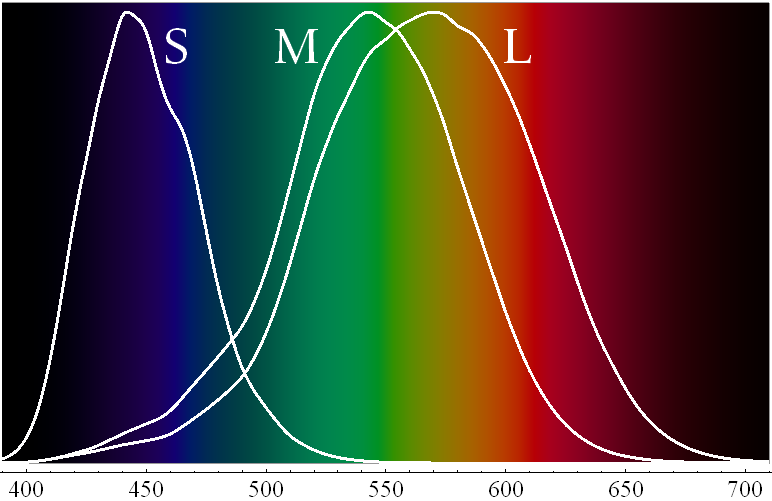

##### *Figure: Normalized responsivity spectra of human cone cells - from Wikimedia Commons*


Each of the three kinds of cones in the human eye gathers a distribution of light centered at a particular wavelength. Green is in the middle of the visible spectrum. The M cone preferentially responds to green but also colors on either side. The red cone L overlaps green to a great extent. The blue cone S is rather isolated in the spectrum but also gathers some green light. This triple-sampling of green is why light that color appears brighter than red or blue, and why its coefficient in calculating luminance $Y$ accounts for more than half of the total weighting. The green cone also samples some red, so the coefficient for red has the middle weighting. The greatest overlap is at the color yellow, which is why we perceive yellow as the brightest of all colors. The blue coefficient gets the smallest weight. 

The large spectral overlap between the red L cone and green M cone is why we seem to perceive so many subtle color gradiations between them (in the red-orange-yellow-green range) as compared to the cyan-blue-indigo-violet range where we are much less sensitive to small shifts in color.

#### The algorithms

The [Cubehelix pallettes in Palettable](https://jiffyclub.github.io/palettable/cubehelix/) provide a means of defining a smooth gradient of brightness across any range of colors. The Python source code for [`Cubehelix.make`](https://jiffyclub.github.io/palettable/cubehelix/#make) uses the NTSC formulation described above. Simply put, the perceived luminance or brightness of any RGB color can be calculated from the formula above. However, `Cubehelix.make` loops through the color spectrum in a specific way (the "helix" part of cubehelix; see [*Green 2011*](https://arxiv.org/abs/1108.5083)). Options are limited. 

Seeking more flexibility to define custom color palettes that adhere to smooth brightness gradients, [sample code from Kerry Halupka](https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72) has been adapted that allows for the definition of a color scale with any number of intermediate colors, as well as specification of the positions of each color in the scale. Intermediate colors are interpolated linearly between the specified colors. The routines `get_continuous_cmap`, `hex_to_rgb` and `rgb_to_dec` from this sample code have been adapted here, with the addition of `rgb_to_hex` and `dec_to_rgb` to round out the functionality. See the [example Jupyter notebook](Gradient_maker_example.ipynb) for examples of their usage.

The main function presented here is `grad_brite`, which takes as input any sequence of colors, their positions on a scale, and 2-3 target birghtnesses along the scale. It produces a color map with the requested number of colors equally spaced on the final scale, adhering to the requested color characteristics. Specifically, it refines the appearance of the continuous color map by applying perceptually uniform brightness gradients. This is done by calculating the luminance $Y$ of each color in the color map, as well as the target luminances based on the requested brightnesses at each end of the scale and optionally one point in the middle. It then rescales the colors to match the target brightnesses. RGB values outside the hex range \#00-#FF are truncated to prevent errors. A Matplotlib `ListedColormap` is returned from the function. 

#### Usage of `grad_brite`

The function `grad_brite` remaps the color sequence `xrgb` (required) into a constant gradient of brightness on the greyscale in 1 or 2 linear segments. **The idea is that you can specify your desired color sequence and independently a brightness gradient - the two will be synthesized and a colormap produced.**

The function call is:

`grad_brite(xrgb, pcol=None, lite_0=0.0, lite_1=1.0, mid_lite=None, mid_spot=None, ncol=256)`  
    
Required argument: 

> `xrgb` = a list of rgb hex strings (form: 'Xrrggbb') giving sequence of colors; it is assumed the first color at a position of 0.0 and the last at 1.0 for the interpolations described below.

Optional arguments:

> `pcol` = a list of float positions on a scale 0.0-1.0 corresponding to colors in xrgb; must be same length as xrgb (default is equally spaced)

> `lite_0` = brightness on scale 0.0-1.0 for first color in list (default 0.0)

> `lite_1` = brightness on scale 0.0-1.0 for last color in list (default 1.0)

> `mid_lite` = if present, defines an intermediate third brightness level. Two linear gradients of brightness 
            are determined - one from 0.0 to `mid_lite` and one from `mid_lite` to 1.0.
            Otherwise, by default a single linear gradient from positions 0.0 to 1.0 is defined.

> `mid_spot` = position between 0.0 and 1.0 where `mid_lite` is placed;
            ignored if `mid_lite=None`

> `ncol` = number of colors in the final colormap (default is 256)

The returned result is a `ncol`-step colormap to use as a `cmap` sequence in plotting. 

Note that it would be straightforward to include any arbitrary number of points of specified brightness. However, the point is to generate colormaps that are attractive and easily readable. A lot of fluctuation in brightness across a color scale is typically undesirable. 

#### Examples

In addition to *sequential* and *diverging* color scales, we also show a third variant called *tailed*, which is a sequential color scale with a contrasting tail on one side of the scale. The *tailed* color scale can be useful for emphasizing an extreme or where distributions are highly asymmetric. The code generating these colormaps is in a [Jupyter Notebook](Gradient_maker_example.ipynb) - it also provides examples of some of the other functions in the Gradient_maker module.

##### Sequential colormaps produced using `grad_brite`:
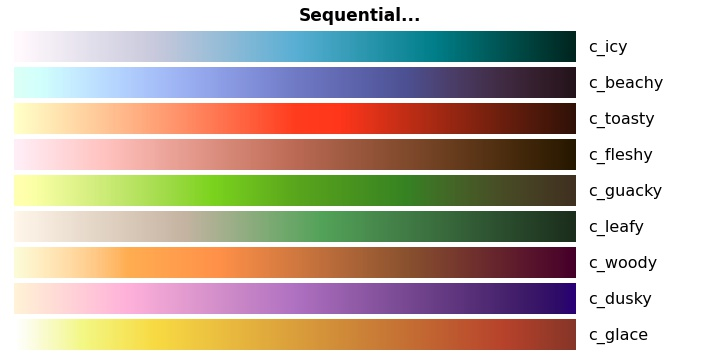

##### Diverging colormaps produced using `grad_brite`:
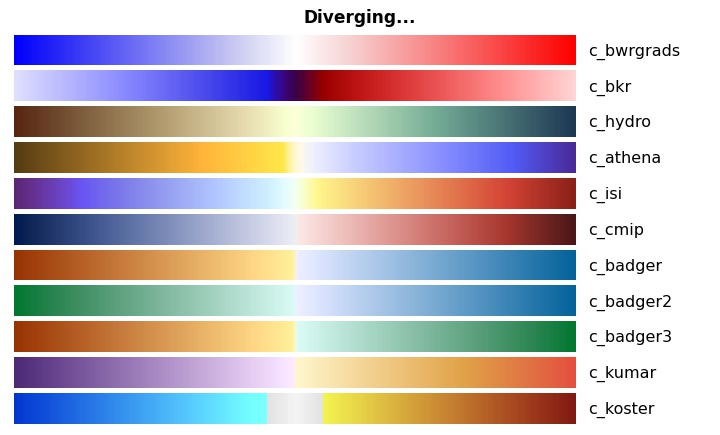

##### Tailed colormaps produced using `grad_brite`:
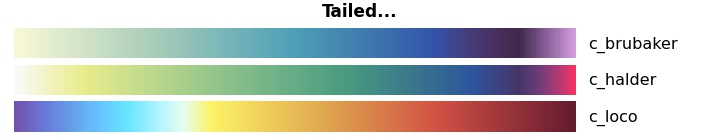

##### Reproduction of GrADS-style colormaps using `grad_brite`: 
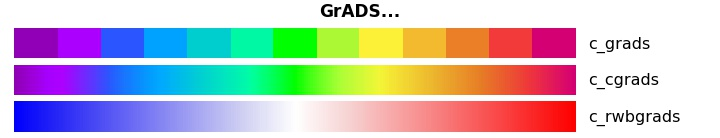

As an example of the smoothness attained in brightness, look at the sequential colormaps with color saturation at zero:

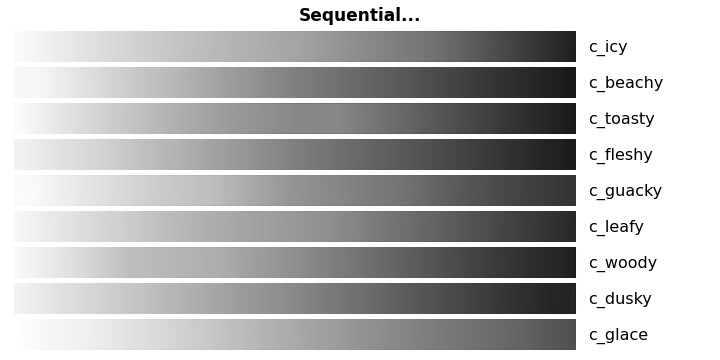

#### Other online resources for color

* Information about colormaps packaged with `matplotlib` is available [here](https://matplotlib.org/tutorials/colors/colormaps.html). Beyond those defaults, [Palettable](https://jiffyclub.github.io/palettable/) is a nice extension that adds access to additional colormaps, including the Colorbrewer schemes mentioned below.
* [Colorbrewer](https://colorbrewer2.org/) is a great resource for perceptually friendly qualitative and discrete color maps.
* For online visualization and testing of color map ideas, check out [Coolers.co](https://coolors.co/gradient-maker/800c0c-faf2c3-3e6f10). It is allows the user a great deal of control to create stepwise linear gradients.
* [Paletton](https://paletton.com/) is another online tool for making palettes having fairly small numbers of discrete colors. The interface is slick, but the results can look flat.
* [ColorHexRGB](https://www.beautycolorcode.com/) provides information about specific colors in RGB space, including previews, color conversions to other schemes, complementary colors, and information about shades, tints and tones. Colors can be queried by name, or by hex value (use the URL followed by the 6-character hex code, e.g.: https://www.beautycolorcode.com/d3b257
* Relatively new is the [SciVisColor Portal](https://sciviscolor.org/) at TACC, which provides both ready-made color maps and the [ColorMoves tool](https://sciviscolor.org/colormovesapp/) for creating complex custom colormaps.
